# Preparing data

In [1]:
# Import labraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# Import data

train_df = pd.read_csv("C:/Users/DOMI TA/Desktop/Data/train.csv", index_col = 0)
test_df = pd.read_csv("C:/Users/DOMI TA/Desktop/Data/test.csv", index_col = 0)


# Exploratory data analysis

(103904, 24)
(25976, 24)


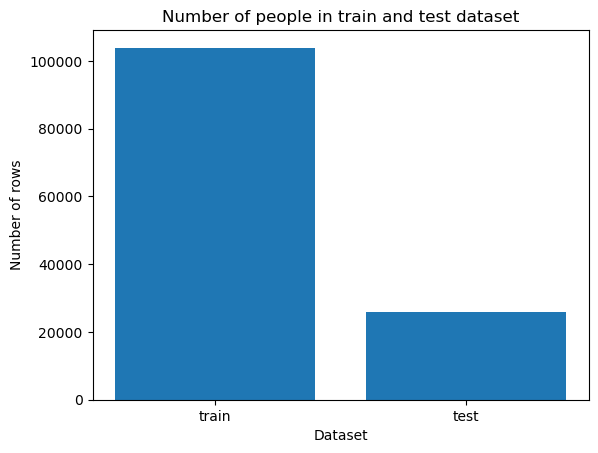

In [3]:

print(train_df.shape)
print(test_df.shape)

# Bar chart about number of people in train and test dataset.
plt.bar(['train', 'test'], [train_df.shape[0],test_df.shape[0]])
plt.xlabel("Dataset")
plt.ylabel("Number of rows")
plt.title("Number of people in train and test dataset")
plt.show()


In [4]:

train_df.head()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:

col_names = train_df.columns
col_names 


Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:

categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class' , 
'Inflight wifi service', 'Departure/Arrival time convenient',
'Ease of Online booking', 'Gate location',
'Food and drink', 'Online boarding', 'Seat comfort',
'Inflight entertainment', 'On-board service', 'Leg room service',
'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

numerical = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

num_cat = len(categorical)
num_num = len(numerical)

print(f"There are {num_cat} categorical variables")
print(f"There are {num_num} numerical variables")


There are 19 categorical variables
There are 4 numerical variables



### Check data of categorical variables.


In [9]:

# Check data whether having null values or not.
train_df[categorical].isnull().sum()


Gender                               0
Customer Type                        0
Type of Travel                       0
Class                                0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

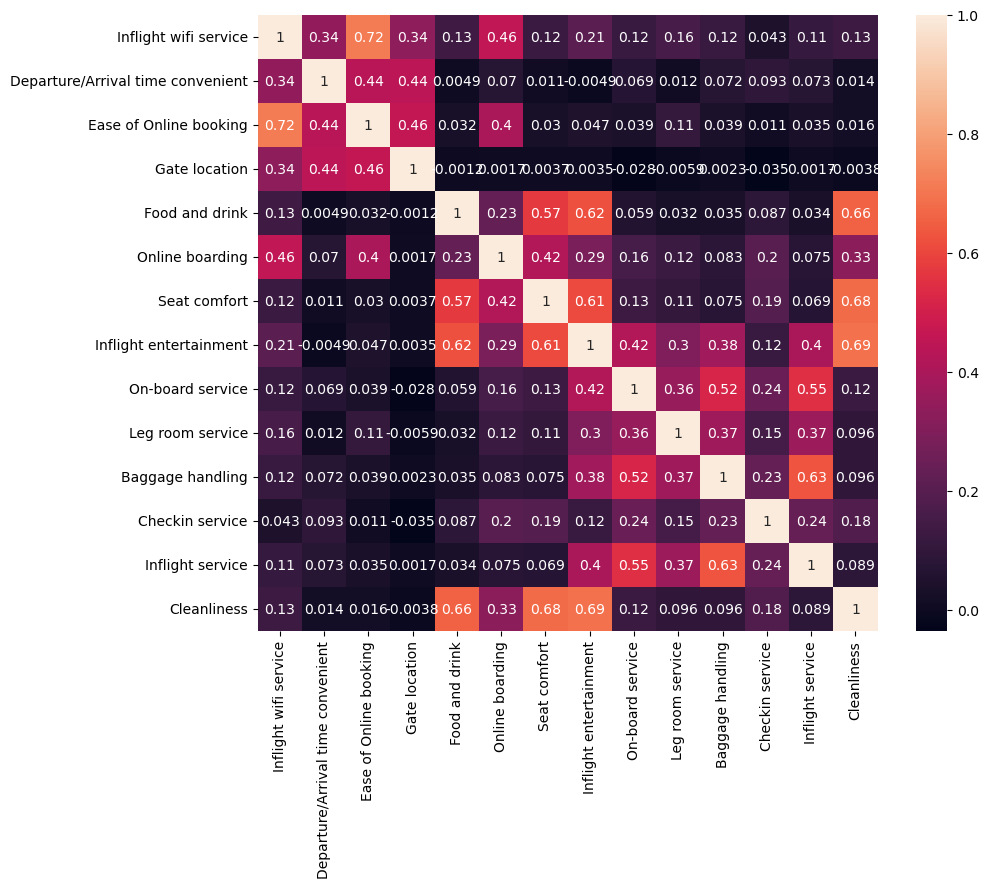

In [10]:
list_a = ['Inflight wifi service', 'Departure/Arrival time convenient',
          'Ease of Online booking', 'Gate location',
          'Food and drink', 'Online boarding', 'Seat comfort',
          'Inflight entertainment', 'On-board service', 'Leg room service',
          'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(train_df[list_a].corr(), annot = True)
plt.show()


In [11]:
for categorical_var in categorical:
    print(categorical_var, ' has ', len(train_df[categorical_var].unique()), 'labels')

Gender  has  2 labels
Customer Type  has  2 labels
Type of Travel  has  2 labels
Class  has  3 labels
Inflight wifi service  has  6 labels
Departure/Arrival time convenient  has  6 labels
Ease of Online booking  has  6 labels
Gate location  has  6 labels
Food and drink  has  6 labels
Online boarding  has  6 labels
Seat comfort  has  6 labels
Inflight entertainment  has  6 labels
On-board service  has  6 labels
Leg room service  has  6 labels
Baggage handling  has  5 labels
Checkin service  has  6 labels
Inflight service  has  6 labels
Cleanliness  has  6 labels
satisfaction  has  2 labels


In [12]:
for categorical_var in categorical:
    print("============================")
    print(train_df[categorical_var].value_counts())

Female    52727
Male      51177
Name: Gender, dtype: int64
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64
4    31765
5    26470
3    18696
2    14897
1   

In [13]:
# Convert data types.
convert_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class' , 
                    'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location',
                    'Food and drink', 'Online boarding', 'Seat comfort',
                    'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

for feature in convert_features:
    train_df[feature] = train_df[feature].astype("category")
    
for feature in convert_features:
    train_df[feature] = train_df[feature].astype("category")

In [14]:

train_df.describe(include = ['category'])


,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


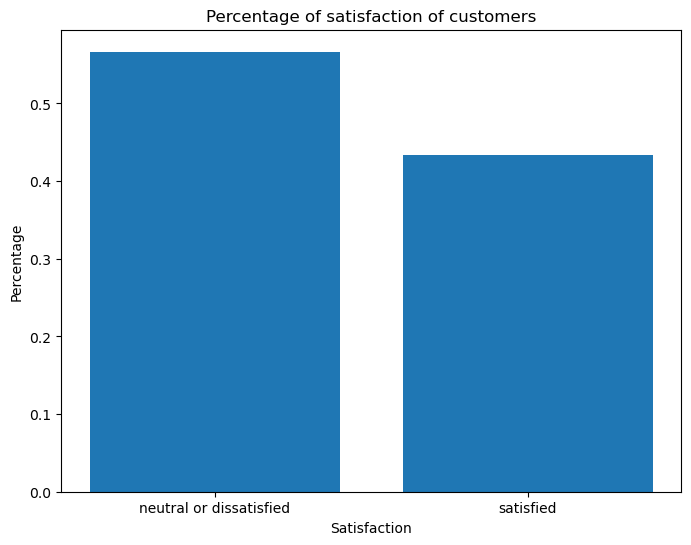

In [15]:
# Visualizing satisfaction percentage.
a = train_df['satisfaction'].value_counts(normalize = True).to_frame()
a.reset_index(inplace=True)
a.columns = ['satisfaction', 'percentage']

plt.figure(figsize=(8, 6))
plt.bar(a['satisfaction'], a['percentage'])

plt.xlabel("Satisfaction")
plt.ylabel("Percentage")
plt.title("Percentage of satisfaction of customers")
plt.show()


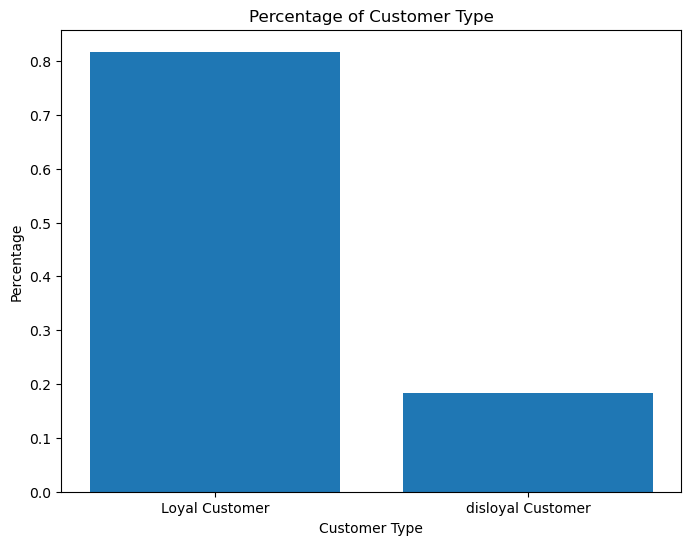

In [16]:

a = train_df['Customer Type'].value_counts(normalize = True).to_frame()
a.reset_index(inplace=True)
a.columns = ['Customer Type', 'percentage']

plt.figure(figsize=(8, 6))
plt.bar(a['Customer Type'], a['percentage'])

plt.xlabel('Customer Type')
plt.ylabel("Percentage")
plt.title("Percentage of" + ' Customer Type')
plt.show()



In [17]:
# Other columns
# 4,5 is good. Under 4 is neutral or bad.

other_categorical_vars = ['Inflight wifi service', 'Departure/Arrival time convenient',
                        'Ease of Online booking', 'Gate location',
                        'Food and drink', 'Online boarding', 'Seat comfort',
                        'Inflight entertainment', 'On-board service', 'Leg room service',
                        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

temp_df = train_df.copy()
for var in other_categorical_vars:
    
    temp_df = temp_df.replace({var : {0 : 'neutral or bad', 1 : 'neutral or bad',2 : 'neutral or bad',
                                      3 : 'neutral or bad',  4:'good',  5:'good', 6:'good'}})

In [18]:
print(temp_df['Inflight wifi service'].value_counts())

neutral or bad    72641
good              31263
Name: Inflight wifi service, dtype: int64


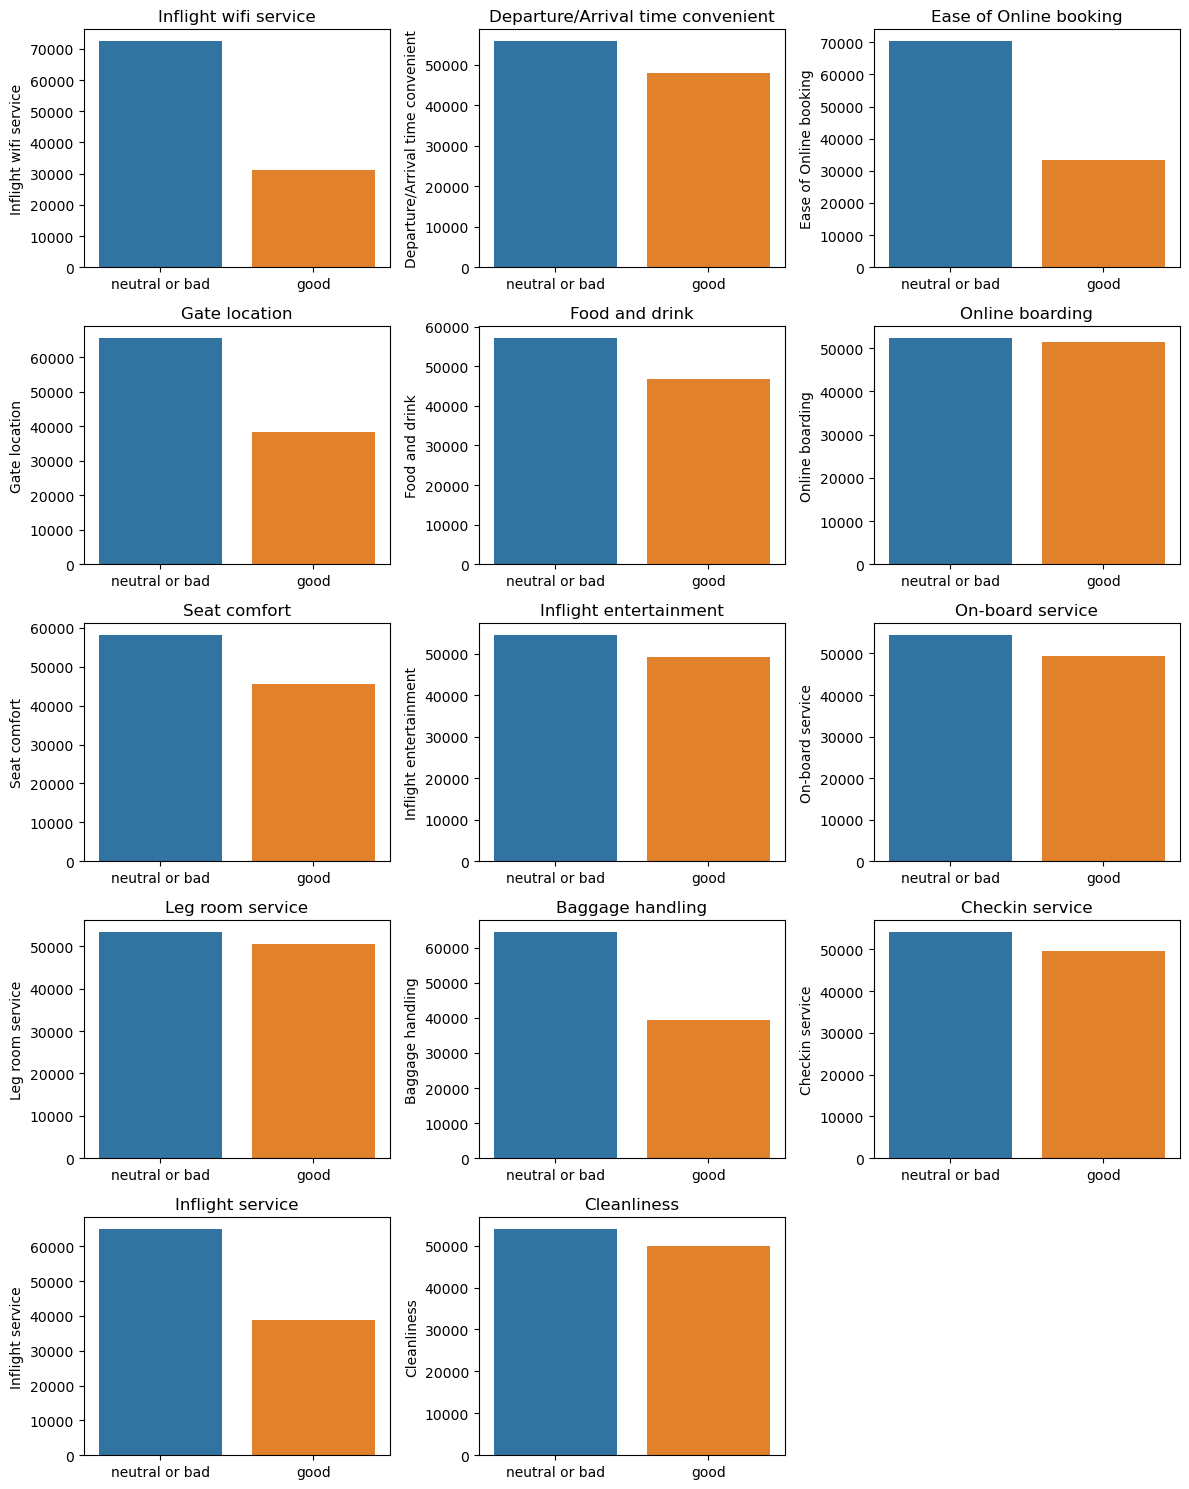

In [19]:
n_rows = 5
n_cols = 3



fig, ax = plt.subplots(n_rows, n_cols, figsize = (4*3, 5*3))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(other_categorical_vars):
            ax_i = ax[r, c]
 
            sns.barplot(data = temp_df, x = ['neutral or bad', 'good'], y =temp_df[other_categorical_vars[i]].value_counts(), ax = ax_i)
            ax_i.set_title(other_categorical_vars[i])
            
ax.flat[-1].set_visible(False)    
plt.tight_layout()

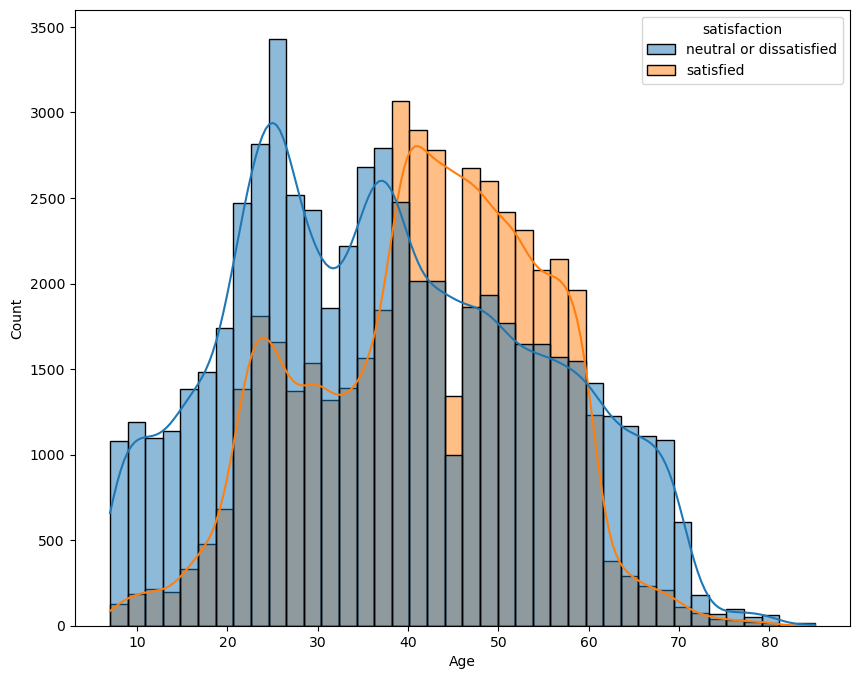

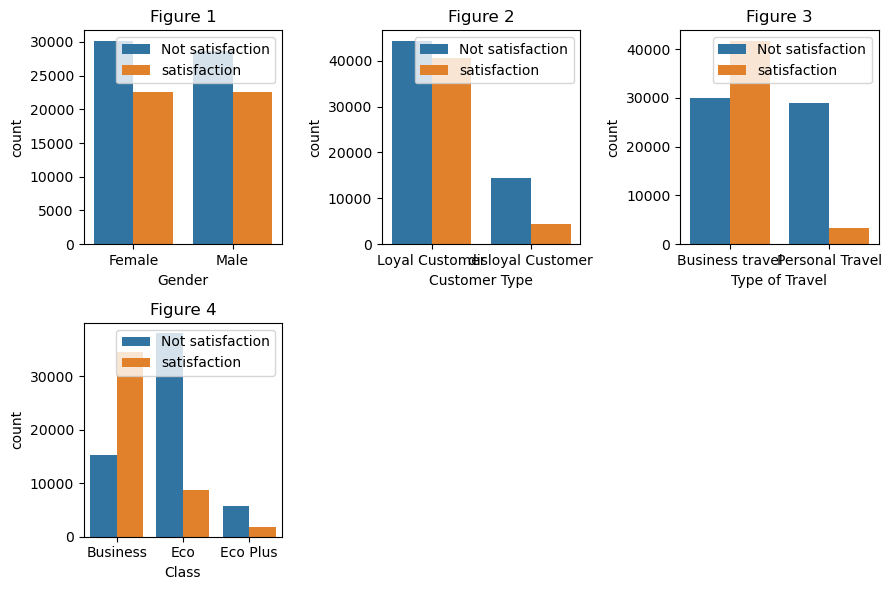

In [20]:

sns.histplot(data = train_df, x = 'Age', hue = 'satisfaction', bins = 40, kde= True)

n_rows = 2
n_cols = 3

cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3, n_rows*3))


for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x = cols[i], hue = 'satisfaction', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}")
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not satisfaction', 'satisfaction'])

ax.flat[-2].set_visible(False) 
ax.flat[-1].set_visible(False) 
plt.tight_layout()



### Data visualization with discrete variables.

<Axes: xlabel='Flight Distance', ylabel='Count'>

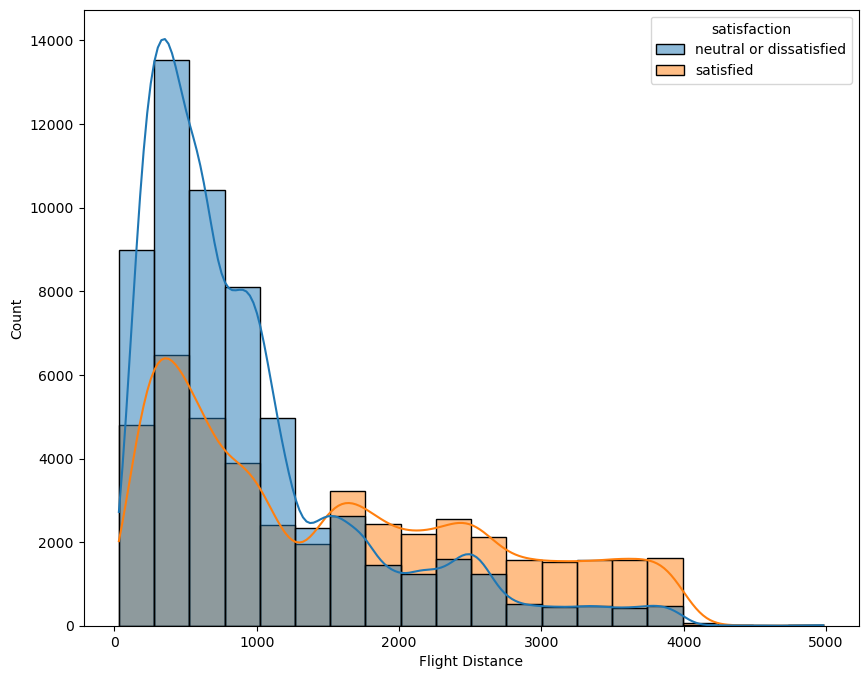

In [21]:

sns.histplot(data = train_df, x = 'Flight Distance', hue = 'satisfaction', bins = 20, kde= True)


<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

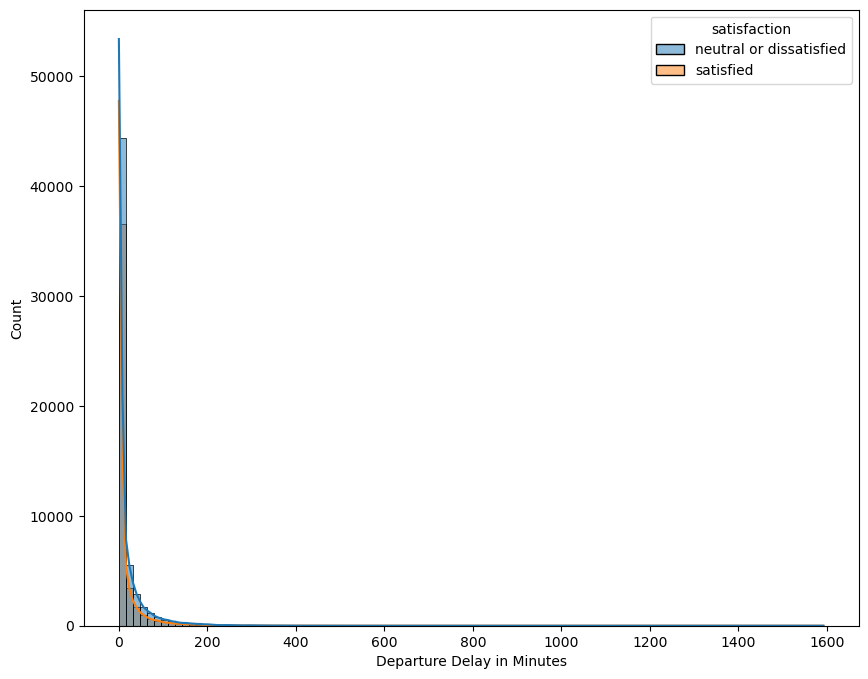

In [22]:
sns.histplot(data = train_df, x = 'Departure Delay in Minutes', hue = 'satisfaction', bins = 100, kde= True)


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

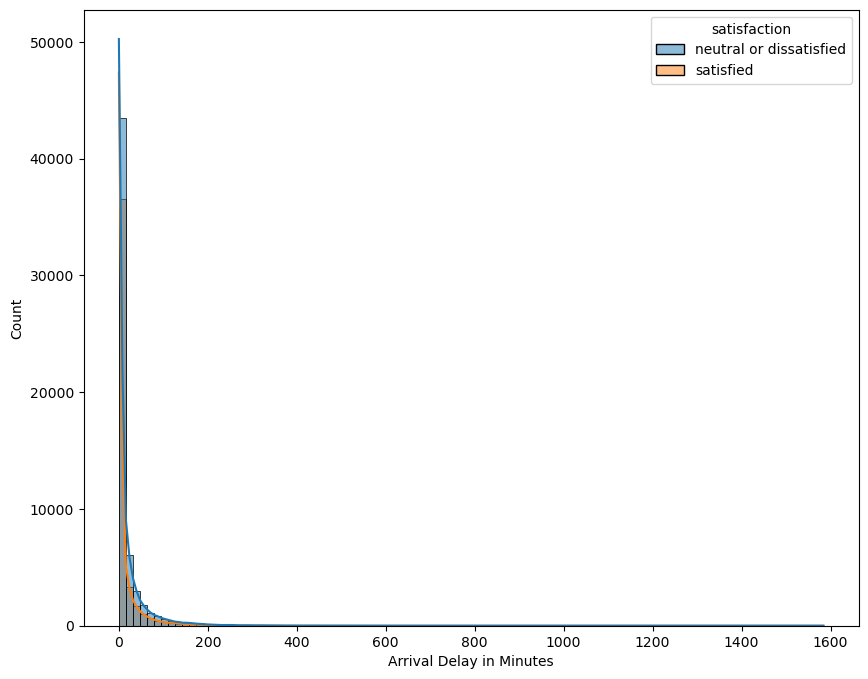

In [23]:
sns.histplot(data = train_df, x = 'Arrival Delay in Minutes', hue = 'satisfaction', bins = 100, kde= True)


# Preprocessing data.

### Drop id column

In [24]:
# Drop id column.
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)



In [25]:

train_df.isnull().sum()


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [26]:
# Drop missing values.
train_df.dropna(subset = numerical, inplace = True)
print("Drop missing values in training dataset successfully.")

test_df.dropna(subset = numerical, inplace = True)
print("Drop missing values in testing dataset successfully.")


Drop missing values in training dataset successfully.
Drop missing values in testing dataset successfully.


In [27]:
train_df[categorical].head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [28]:

train_df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
for categorical_var in categorical:
    print(categorical_var, ' has ', len(train_df[categorical_var].unique()), 'labels')
print("=====================================")
for categorical_var in categorical:
    print(categorical_var, ' has ', len(test_df[categorical_var].unique()), 'labels') 

    
print(len(train_df.columns))
print(len(test_df.columns))
    
    

Gender  has  2 labels
Customer Type  has  2 labels
Type of Travel  has  2 labels
Class  has  3 labels
Inflight wifi service  has  6 labels
Departure/Arrival time convenient  has  6 labels
Ease of Online booking  has  6 labels
Gate location  has  6 labels
Food and drink  has  6 labels
Online boarding  has  6 labels
Seat comfort  has  6 labels
Inflight entertainment  has  6 labels
On-board service  has  6 labels
Leg room service  has  6 labels
Baggage handling  has  5 labels
Checkin service  has  6 labels
Inflight service  has  6 labels
Cleanliness  has  6 labels
satisfaction  has  2 labels
Gender  has  2 labels
Customer Type  has  2 labels
Type of Travel  has  2 labels
Class  has  3 labels
Inflight wifi service  has  6 labels
Departure/Arrival time convenient  has  6 labels
Ease of Online booking  has  6 labels
Gate location  has  5 labels
Food and drink  has  6 labels
Online boarding  has  6 labels
Seat comfort  has  5 labels
Inflight entertainment  has  6 labels
On-board service  has 

In [30]:
### replacing 5 values columns

for categorical_var in categorical:
    if len(train_df[categorical_var].unique()) == 5 or len(test_df[categorical_var].unique()) == 5:
        
        train_df.drop(categorical_var, axis = 1, inplace = True)
        test_df.drop(categorical_var, axis = 1, inplace = True)
        categorical.remove(categorical_var)
        

train_df.drop('Checkin service', axis = 1, inplace = True)
test_df.drop('Checkin service', axis = 1, inplace = True)

categorical.remove('Checkin service')

In [31]:
# Convert categorical columns to dummy colomns. 
dummies_list = categorical[:-1]

for var in dummies_list:
    # With training dataset
    dummy_var = pd.get_dummies(train_df[var])
    train_df = pd.concat([train_df, dummy_var], axis = 1)
    train_df.drop(var, axis = 1, inplace = True)
    
    # With testing dataset
    dummy_var = pd.get_dummies(test_df[var])
    test_df = pd.concat([test_df, dummy_var], axis = 1)
    test_df.drop(var, axis = 1, inplace = True)



In [32]:
print(train_df.head())

   Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0   13              460                          25                      18.0   
1   25              235                           1                       6.0   
2   26             1142                           0                       0.0   
3   25              562                          11                       9.0   
4   61              214                           0                       0.0   

              satisfaction  Female  Male  Loyal Customer  disloyal Customer  \
0  neutral or dissatisfied       0     1               1                  0   
1  neutral or dissatisfied       0     1               0                  1   
2                satisfied       1     0               1                  0   
3  neutral or dissatisfied       1     0               1                  0   
4                satisfied       0     1               1                  0   

   Business travel  ...  2  3  4  5  0

In [33]:

X_train = train_df.copy()
X_train.drop('satisfaction', inplace = True, axis =1 )
X_train.head()



,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,...,2,3,4,5,0,1,2,3,4,5
0,13,460,25,18.0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,25,235,1,6.0,0,1,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
2,26,1142,0,0.0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,25,562,11,9.0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,61,214,0,0.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [34]:
X_test = test_df.copy()
X_test.drop('satisfaction', inplace = True, axis = 1)
X_test.head()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,...,2,3,4,5,0,1,2,3,4,5
0,52,160,50,44.0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,36,2863,0,0.0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,20,192,0,0.0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,44,3377,0,6.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,49,1182,0,20.0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


### Handling discrete variables

In [35]:

discrete_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [36]:
from sklearn.decomposition import PCA

X_train_discrete = train_df[discrete_vars].to_numpy()
X_train_discrete.shape

X_test_discrete = test_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].to_numpy()
X_test_discrete.shape


pca = PCA(n_components = 2)
pca = pca.fit(X_train_discrete)

X_train_discrete = pca.transform(X_train_discrete)
X_test_discrete = pca.transform(X_test_discrete)

X_train_discrete.shape, X_test_discrete.shape


((103594, 2), (25893, 2))

In [37]:

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scaler = StandardScaler().fit(X_train_discrete)

X_train_discrete = scaler.transform(X_train_discrete)
X_test_discrete = scaler.transform(X_test_discrete)

print(X_train_discrete)
print("============================")
print(X_test_discrete)



[[-0.73134313  0.17229051]
 [-0.95693588 -0.30004494]
 [-0.04747352 -0.39218429]
 ...
 [ 0.8078456  -0.11562681]
 [-0.18986479 -0.39198626]
 [ 0.53510403 -0.39201887]]
[[-1.03209837  0.83948763]
 [ 1.67821007 -0.39214115]
 [-1.00005962 -0.39217763]
 ...
 [-0.36233894 -0.39173656]
 [-0.06253242 -0.39142828]
 [-0.92783093 -0.39354613]]


(array([1.02137e+05, 1.25400e+03, 1.65000e+02, 2.20000e+01, 7.00000e+00,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([-0.39635398,  3.77429892,  7.94495183, 12.11560473, 16.28625763,
        20.45691054, 24.62756344, 28.79821635, 32.96886925, 37.13952215,
        41.31017506]),
 <BarContainer object of 10 artists>)

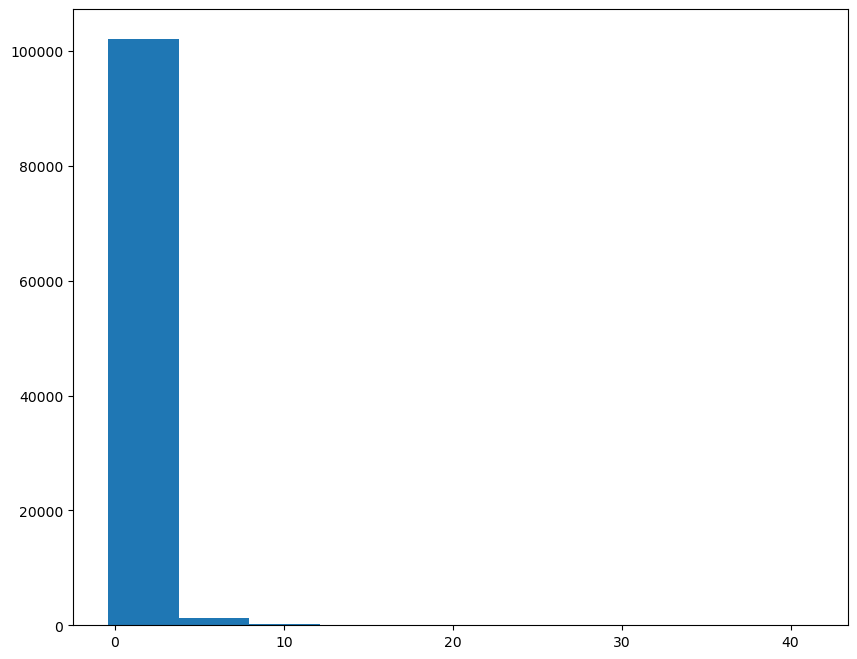

In [38]:
plt.hist(X_train_discrete[:, 1])

(array([2.5255e+04, 5.1200e+02, 8.9000e+01, 2.3000e+01, 5.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.39634058,  2.54937194,  5.49508445,  8.44079697, 11.38650949,
        14.33222201, 17.27793453, 20.22364705, 23.16935956, 26.11507208,
        29.0607846 ]),
 <BarContainer object of 10 artists>)

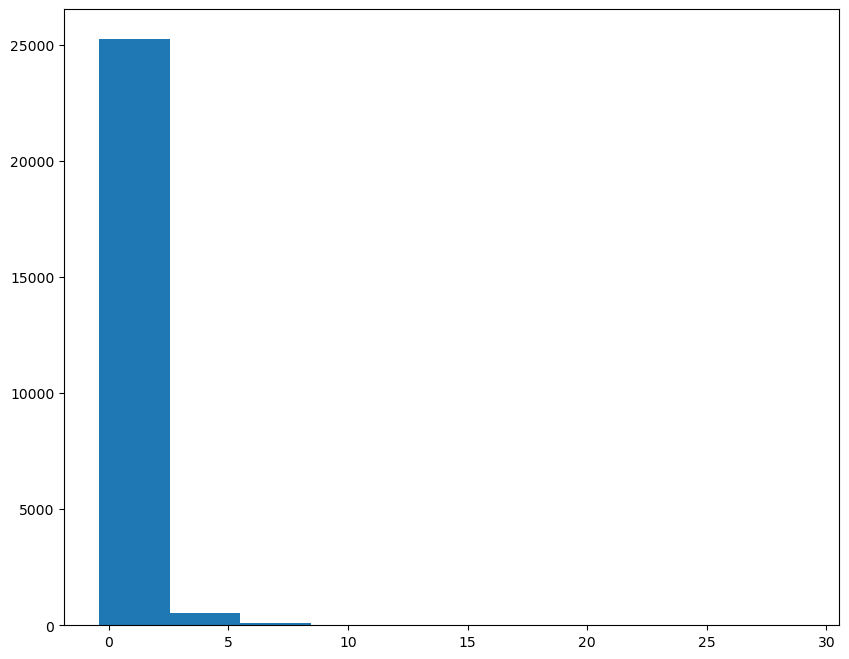

In [39]:
plt.hist(X_test_discrete[:, 1])

In [40]:

for var in discrete_vars:
    # With training dataset
    X_train.drop(var, axis = 1, inplace = True)
    
    # With testing dataset
    X_test.drop(var, axis = 1, inplace = True)


In [41]:
X_train.head()

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,0,...,2,3,4,5,0,1,2,3,4,5
0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
X_train = np.concatenate((X_train, X_train_discrete), axis = 1)
X_test = np.concatenate((X_test, X_test_discrete), axis = 1)


In [44]:

y_train = train_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
y_test = test_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

print(y_train)
print(y_test)


0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103594, dtype: category
Categories (2, int64): [0, 1]
0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25893, dtype: int64


In [45]:

print(X_train.shape)
print(y_train.shape)

(103594, 71)
(103594,)


# Train the model and analyze the efficiency.

In [52]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [53]:

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    

In [54]:

print_score(logreg, X_train, y_train, X_test, y_test, train=False)


Test Result:
Accuracy Score: 92.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.929564      0.926764  0.928359      0.928164      0.928335
recall         0.943833      0.908579  0.928359      0.926206      0.928359
f1-score       0.936644      0.917581  0.928359      0.927113      0.928277
support    14528.000000  11365.000000  0.928359  25893.000000  25893.000000
_______________________________________________
Confusion Matrix: 
 [[13712   816]
 [ 1039 10326]]



In [55]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=1000)

In [56]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 95.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.948962      0.959045  0.953269      0.954003      0.953388
recall         0.968819      0.933392  0.953269      0.951105      0.953269
f1-score       0.958787      0.946045  0.953269      0.952416      0.953194
support    14528.000000  11365.000000  0.953269  25893.000000  25893.000000
_______________________________________________
Confusion Matrix: 
 [[14075   453]
 [  757 10608]]

